In [ ]:
%pip install fastparquet

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fastparquet import ParquetFile
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [8]:
file_path = "Data/train_ai_comp_final_dp.parquet"
pf = ParquetFile(file_path)
df = pf.to_pandas()
df.head()

,id,target,sample_ml_new,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66,feature67,feature68,feature69,feature70,feature71,feature72,feature73,feature74,feature75,feature76,feature77,feature78,feature79,feature80,feature81,feature82,feature83,feature84,feature85,feature86,feature87,feature88,feature89,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature110,feature111,feature112,feature113,feature114,feature115,feature116,feature117,feature118,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,feature128,feature129,feature130,feature131,feature132,feature133,feature134,feature135,feature136,feature137,feature138,feature139,feature140,feature141,feature142,feature143,feature144,feature145,feature146,feature147,feature148,feature149,feature150,feature151,feature152,feature153,feature154,feature155,feature156,feature157,feature158,feature159,feature160,feature161,feature162,feature163,feature164,feature165,feature166,feature167,feature168,feature169,feature170,feature171,feature172,feature173,feature174,feature175,feature176,feature177,feature178,feature179,feature180,feature181,feature182,feature183,feature184,feature185,feature186,feature187,feature188,feature189,feature190,feature191,feature192,feature193,feature194,feature195,feature196,feature197,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature207,feature208,feature209,feature210,feature211,feature212,feature213,feature214,feature215,feature216,feature217,feature218,feature219,feature220,feature221,feature222,feature223,feature224,feature225,feature226,feature227,feature228,feature229,feature230,feature231,feature232,feature233,feature234,feature235,feature236,feature237,feature238,feature239,feature240,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249,feature250,feature251,feature252,feature253,feature254,feature255,feature256,feature257,feature258,feature259,feature260,feature261,feature262,feature263,feature264,feature265,feature266,feature267,feature268,feature269,feature270,feature271,feature272,feature273,feature274,feature275,feature276,feature277,feature278,feature279,feature280,feature281,feature282,feature283,feature284,feature285,feature286,feature287,feature288,feature289,feature290,feature291,feature292,feature293,feature294,feature295,feature296,feature297,feature298,feature299,feature300,feature301,feature302,feature303,feature304,feature305,feature306,feature307,feature308,feature309,feature310,feature311,feature312,feature313,feature314,feature315,feature316,feature317,feature318,feature319,feature320,feature321,feature322,feature323,feature324,feature325,feature326,feature327,feature328,feature329,feature330,feature331,feature332,feature333,feature334,feature335,feature336,feature337,feature338,feature339,feature340,feature341,feature342,feature343,feature344,feature345,feature346,feature347,feature348,feature349,feature350,feature351,feature352,feature353,feature354,feature355,feature356,feature357,feature358,feature359,feature360,feature361,feature362,feature363,feature364,feature365,feature366,feature367,feature368,feature369,feature370,feature371,fe

In [9]:
def feature_drop(data):
    return data.copy().loc[:, data.nunique() != 1].drop(columns=["feature642", "feature756"], axis = 1)


In [10]:
scaler = StandardScaler()
df_toscale = feature_drop(df)
scaled_df = scaler.fit_transform(df_toscale)

KeyboardInterrupt: 

Catboost baseline model

In [2]:
from sklearn.cluster import KMeans

In [11]:
scaler = MinMaxScaler()
df_toscale = feature_drop(df)
scaled_df = scaler.fit_transform(df_toscale)
k = 5
kmeans = KMeans(n_clusters=k, random_state=7)
kmeans.fit(scaled_df)
df_toscale["cluster"] = kmeans.labels_

/cephfs/soft/anaconda3/envs/students2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [3]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, roc_auc_score

learn = feature_drop(scaled_df)
learn = learn[["feature1004", "feature341", "feature940", "feature319", "feature951", "feature988", "feature920", "feature44", "feature1", "feature90", "feature783", "feature782", "feature191", "feature907", "feature211", "feature342", "feature98", "feature94", "feature122", "feature209", "feature46", "feature900", "feature591", "feature454", "feature180", "feature989", "feature861", "feature1036", "feature470", "feature928", "feature898", "feature226", "feature25", "feature358", "feature446", "feature893", "feature5", "feature755", "feature572", "feature497", "feature930", "feature922", "feature472", "feature504", "feature688", "feature1075", "feature435", "feature141", "feature915", "feature540", "feature368", "feature459", "feature94", "feature316", "feature532", "feature817", "feature919", "feature2", "feature781", "feature287", "feature934", "feature1056", "feature89", "feature986", "feature491", "feature506", "feature489", "feature997", "feature340", "feature351", "feature182", "feature53", "feature715", "feature4", "feature918", "feature366", "feature854", "feature75", "feature917", "feature531", "feature554", "feature429", "feature405", "feature892", "feature335", "feature3", "feature286", "feature374", "feature777", "feature508", "feature488", "feature553", "feature810", "feature344", "feature154", "feature527", "feature820", "feature1045", "feature537", "feature856", "feature1065", "feature188", "feature535", "feature12", "feature1064", "feature932", "feature897", "feature452", "feature926", "feature82", "feature599", "feature1057", "feature393", "feature20"
]]
X = learn.drop(columns=['target'])
y = learn['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='Logloss', cat_features=["cluster"])
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=100)

y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {classification_report(y_test, y_pred)}')

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')

NameError: name 'feature_drop' is not defined

In [14]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')

Precision: 0.5555555555555556
Recall: 0.006700616456714018
ROC AUC: 0.5032504998604235


In [19]:
t_df = df.T

In [22]:
t_df['variance'] = t_df.apply(lambda row: np.var(row), axis=1)

In [31]:
t_df['variance']

id               4.000125e+10
target           3.440182e-02
sample_ml_new    0.000000e+00
feature1         9.967335e+04
feature2         4.361894e+05
feature3         2.006789e+03
feature4         4.942138e+08
feature5         5.585178e+03
feature6         1.637267e+03
feature7         3.152156e+03
feature8         1.616914e+04
feature9         1.438408e+04
feature10        6.252590e+03
feature11        2.953620e+03
feature12        5.532356e+03
feature13        5.585178e+03
feature14        1.011509e+04
feature15        1.531413e+04
feature16        1.082587e+04
feature17        1.368873e+04
feature18        1.238254e+02
feature19        5.664926e+03
feature20        5.662258e+03
feature21        1.039312e+04
feature22        3.114523e+09
feature23        4.599503e-04
feature24        1.157294e+03
feature25        2.472284e+05
feature26        5.581025e-05
feature27        3.040680e-04
feature28        4.599503e-04
feature29        1.180233e+03
feature30        2.279849e+05
feature31 

<Axes: >

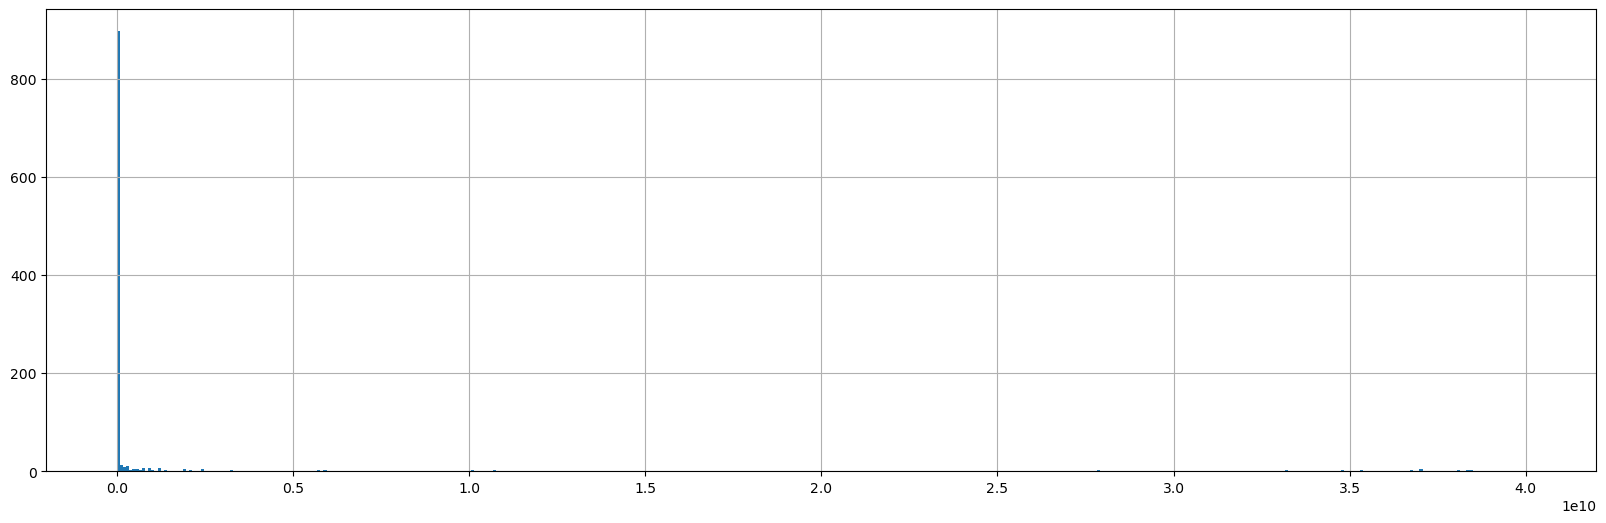

In [30]:
t_df['variance'].hist(figsize=(20, 6), bins=450)

In [32]:
from sklearn.manifold import TSNE

In [1]:
# Предполагается, что df_toscale уже загружен
features = df_toscale.drop(columns=['target', "id"])
targets = df_toscale['target']

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(features)

# Выполняем t-SNE на масштабированных признаках
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_df)

# Визуализация с подсветкой в соответствии с таргетами
plt.figure(figsize=(10,6))
# Для улучшения визуализации используем различные маркеры
for i, t in enumerate(np.unique(targets)):
    idx = targets == t
    plt.scatter(tsne_results[idx, 0], tsne_results[idx, 1], label=f"Class {t}", alpha=0.5)

plt.legend(title="Classes")
plt.colorbar(scatter, label='Target Value')

plt.title('t-SNE визуализация с цветами таргетов')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

NameError: name 'df_toscale' is not defined